# MSiA422 Java & Python Homework 1
By Lauren Yu

### Exercise 1 – Procedural vs Functional Programming

In [4]:
#This to clear old variables and make sure we start clean.
%reset
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


Please find below the two functions. One is procedural and the other is functional. <br />
Each function takes a list as input. Error message will show if something other than a list is given.

In [19]:
def procedure(l):
    if isinstance(l, list):
        c1,c2=0,0
        #c1 count of words
        #c2 count of numbers
        for ll in l:
            c2=isinstance(ll,int)+c2
            #Check each element in list l, if it's an integer, add to c2
            if isinstance(ll,str):
                #If the element is a string, we split it and form new list k
                #Length of k will naturally be word count in that string
                k=ll.split(' ')
        c1=c1+len(k)
        print("Count of numbers:", c2)
        print("Count of words:", c1)
    else:
        print("Error! You sure you gave me a list?")

In [20]:
def functional(l):
    if isinstance(l, list):
        #Form a list of strings for all strings in l, split each string into new sublists of individual words
        #Count length of each sublist (word count)
        #Sum all word counts
        words=sum([len(ll.split()) for ll in l if isinstance(ll,str)])
        #The length of the list consisting of all integers in our list l
        #will just be the number of integers
        numbers=len([ll for ll in l if isinstance(ll,int)])
        print("Count of numbers:", numbers)
        print("Count of words:", words)
    else:
        print("Error! You sure you gave me a list?")

Let's see how the two functions handle error.

In [21]:
functional('Ha')

Error! You sure you gave me a list?


In [22]:
procedure('Ha')

Error! You sure you gave me a list?


In [23]:
#Now let's just test a random list
test=[1,2,3,'Haha','I am here','I never know']
procedure(test)
print('----------')
functional(test)

Count of numbers: 3
Count of words: 3
----------
Count of numbers: 3
Count of words: 7


Then let's write a function *timecomparison* that:
- Generate a list of certain length (input), randomly consisting of integers and strings.
- Track the time it takes to run functional or procedural functions for lists of varying length (varying between min and max length)
- Store the time records in a list. Return the list, which will be used for plotting later.

Input:
- 'functiontype': determines the type of function we run, whether it be 'functional' or 'procedural'. Doesn't take other arguments.
- 'minlength': the minimum length of the list.
- 'maxlength': the max length of the list.

To generate the list, which randomly consists of integers and strings:
- The integer will always be 100. There's no point in varying this.
- For the string, let's vary it using a function **'randomword'**, which takes length as input.
 - Let's randomly choose *n (n=length, which is input) characters in the pool of letters 'abcdefghijk' and blank.
 - The result will be something like 'iabh jakbbhhajge ebi' (input length=20), which has 3 word counts
 - Let's try *randomword(20)* again and we get 'edeekicffbeddigchdah', which has 1 word count.
 - This is how we randomize the word count in a string.

In [25]:
import random, string
from timeit import Timer

def randomword(length):
    #Let's randomly choose *n (n=length, which is input)
    #characters in the pool of letters 'abcdefghijk' and blank.
    #A string will be returned.
    if isinstance(length, int):
        return ''.join(random.choice('abcdefghijk'+' ') for i in range(length))
    else:
        print("Error. Please give me an integer.")
    
def timecomparison(functiontype,minlength,maxlength):
    if isinstance(minlength, int) & isinstance(maxlength, int):
        #Create an empty list to store all the tracked time records
        time=[]
        maxlength=maxlength+1
        for i in range(minlength,maxlength):
            #Generate a list consisting of random numbers chosen from the range of min and max length
            #The list length is i-minlength
            rand_sample=random.sample(range(minlength, maxlength+1),i-minlength+1)
            #For odd numbers in rand_sample, we assign it an integer
            #Else the randomized string
            test=[randomword(k) if k%2==1 else 100 for k in rand_sample]
            #Now we get the time and append it to time list.
            if functiontype=='functional':
                time.append(Timer(lambda: functional(test)).timeit(number=1))
            elif functiontype=='procedural':
                time.append(Timer(lambda: procedure(test)).timeit(number=1))
            else:
                print('Function type not accepted!')
        return time
    else:
        print("Please input integers.")

Let's see how the *timecomparison* function handles error.

In [30]:
timecomparison('Undefined function',1,2)
print('------')
timecomparison('procedural','length',2)

Function type not accepted!
Function type not accepted!
------
Please input integers.


Here we re-define the two functions ('procedure','functional') so that it **doesn't print out anything**. The output is silenced. Everything else stays the same.

In [31]:
def procedure(l):
    c1,c2=0,0
    #c1 count of words
    #c2 count of numbers
    for ll in l:
        c2=isinstance(ll,int)+c2
        #Check each element in list l, if it's an integer, add to c2
        if isinstance(ll,str):
            #If the element is a string, we split it and form new list k
            #Length of k will naturally be word count in that string
            k=ll.split(' ')
            c1=c1+len(k)
            
def functional(l):
    #Form a list of strings for all strings in l, split each string into new sublists of individual words
    #Count length of each sublist (word count)
    #Sum all word counts
    words=sum([len(ll.split()) for ll in l if isinstance(ll,str)])
    #The length of the list consisting of all integers in our list l
    #will just be the number of integers
    numbers=len([ll for ll in l if isinstance(ll,int)])

Now let's plot the time it takes for both functions, with list length varying from 1 to 100.

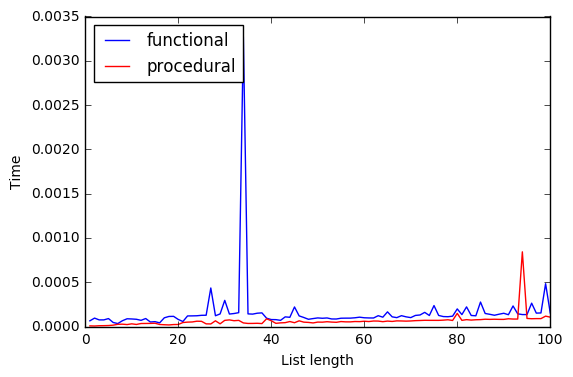

In [32]:
plot(range(1,101),timecomparison('functional',1,100), color='blue', label='functional')
plot(range(1,101),timecomparison('procedural',1,100),color='red', label='procedural')
xlabel('List length')
ylabel('Time')
legend(loc='upper left')

Now let's plot the time it takes for both functions, with list length varying from 100 to 500.

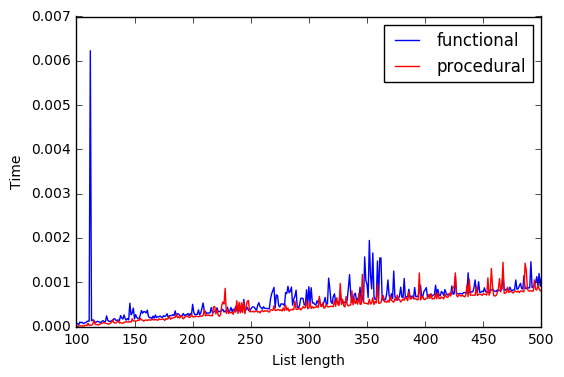

In [33]:
plot(range(100,501),timecomparison('functional',100,500), color='blue', label='functional')
plot(range(100,501),timecomparison('procedural',100,500),color='red', label='procedural')
xlabel('List length')
ylabel('Time')
legend(loc='upper right')

We can clearly see for most of the times, *functional* outperforms *procedural*.

<hr />
### Exercise 2 – Simple Grading System - memory based**

To begin with, let's design the dictionary. 
- Given that each student is uniquely identified by a tuple of id and name, the dictionary key will thus be such a tuple. 
- Each student has both a raw score and a letter grade. So the dictionary will nested, with the second level key being 'Raw' or 'Final'.

Please see the below dictionary as an example:

In [34]:
d={(1,'Mary'):{'Raw':95,'Final':'A'}, (2,'James'):{'Raw':85,'Final':'B'}}

If we want to know Mary's grades (raw score and letter grade), we can simply do the following:

In [35]:
print(d[(1,'Mary')]['Final'],d[(1,'Mary')]['Raw'])

A 95


Now let's design a function that enables user to add new observations to the dictionary.

Given:
- Student name and id
- Raw score for each project and homework

The function will:
- Output his or her final raw score and letter grade
- Add the new observation into the dictionary

In [36]:
def add(info):
    #Each homework has a perfect score of 100 and has weight of 10%
    #Each project has a perfect score of 100 and has weight of 20%
    #Input 'info' is a string
    #For example: "Helen,5,90,90,80,90,95,100,90,90"
    try:
        info=info.split(',')
        name,studentid=str(info[0]),int(info[1])
        h1,h2,h3,h4,h5,h6=int(info[2]),int(info[3]),int(info[4]),int(info[5]),int(info[6]),int(info[7])
        p1,p2=int(info[8]),int(info[9])
        #Calculate the raw score
        raw=(h1+h2+h3+h4+h5+h6)/10+(p1+p2)/5
        if raw>=90:
            let='A'
        elif raw>=80:
            let='B'
        elif raw>=20:
            let='C'
        elif raw>10:
            let='D'
        else:
            let='F'
        scores={'Raw':raw,'Final':let}
        #Append the dictionary into the big nested dictionary
        d[(studentid,name)]=scores
        print('--------------')
        print("Final score:",raw, " Letter grade:", let)
    except:
        print('Make sure you input the corect info format.')
        print('Example: Helen,5,90,90,80,90,95,100,90,90')

Let's see how the function handles error.

In [37]:
add("Helen,5,a,90,80,90,95,100,90,90")

Make sure you input the corect info format.
Example: Helen,5,90,90,80,90,95,100,90,90


Now let's try the function by adding the following observation. The final result for that student will be printed out.

In [38]:
add("Helen,5,90,90,80,90,95,100,90,90")

--------------
Final score: 90.5  Letter grade: A


To generate the menu user interface, I used ipywidget package (https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/) to generate an user interface. You will soon see a text box where you can input different commands.

In [39]:
def menu(command):
    if command == 'add':
        #Import all the necessary packages
        from ipywidgets import widgets
        from IPython.display import display
        #Allows you to input student info in the textbook
        info=widgets.Text()
        display(info)
        def handle_submit(sender):
            add(info.value)
            info.close() #Close the textbox after you are done
        info.on_submit(handle_submit)
        
        
    elif command == 'print':
        #To put a list of student info, sorted by name
        print('------------')
        for h in sorted(d, key=lambda x: x[1]):  
        #sorting dictionary by second value in key (which is a tuple)
            print(h[0],h[1],d[h]['Raw'],d[h]['Final'])
            
    elif command=='summary':
        #To print a summary of student scores, max, min and avg etc
        print('------------')
        print('Student Count:', len(d.items()))
        print('Min Score:', min([d[i]['Raw'] for i in d]))
        print('Max Score:', max([d[i]['Raw'] for i in d]))
        print('Mean Score:', mean([d[i]['Raw'] for i in d]))
        print('StdDev:', std([d[i]['Raw'] for i in d]))
        
    elif command=='plot':
        #To generate a pie chart
        allgrades=[d[i]['Final'] for i in d]
        labels = list(unique(allgrades))
        #Labels for pie chart should be the unique letter grades
        sizes=[allgrades.count(i) for i in labels] 
        #Count the frequency of each unique letter grades
        pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
        
    elif command=='exit':
        #To exit the UI. The textbox will disappear.
        print('------------')
        print("Bye bye")
        
    else:
        print('------------')
        print("I can't recognize the command. What do ya want?")

In [43]:
from ipywidgets import widgets
from IPython.display import display

do=widgets.Text()
display(do)

def handle_submit(sender):
    menu(do.value)
    if do.value=='exit':
        do.close()
    
do.on_submit(handle_submit)
print("Input your commands(case-sensitive) \n")
print("add: add new observations")
print("  -in the order of: name, id, homework 1-6, project 1-2, separated by commas")
print("  -example: Maria,15,90,90,80,90,95,100,90,90 ")
print("print: Print a list of student names, final scores, and letter grades sorted by names.")
print("summary: Print score summary (Student Count, Min, Max, Avg. , StdDev)")
print("plot: Plot a pie chart showing the final letter grades distribution.")
print("exit: Exit the system. The text box will disappear.")

Input your commands(case-sensitive) 

add: add new observations
  -in the order of: name, id, homework 1-6, project 1-2, separated by commas
  -example: Maria,15,90,90,80,90,95,100,90,90 
print: Print a list of student names, final scores, and letter grades sorted by names.
summary: Print score summary (Student Count, Min, Max, Avg. , StdDev)
plot: Plot a pie chart showing the final letter grades distribution.
exit: Exit the system. The text box will disappear.


<hr />

### Exercise 3 - PyPrind package: Python Progress Bar<br />
See package: https://pypi.python.org/pypi/PyPrind/
<br/>At times when you have to run a really long loop in Python, you just want to know whether you should stay for one more minute or just walk away and grab coffee. PyPrind provides exactly such clarity. During a loop or some other iterative computation, it would be able to display a progress bar, coupled with estimated remaining time and even progress percentage. You even get to choose your own progress bar style!

The basic syntax is:<br/>
`bar = pyprind.ProgBar(n, track_time=True, monitor=True, title='Progress bar',
                     bar_char='$', width=50)`

Also, remember to update the `bar()` inside the loop you are running using `bar.update()`.

**For the progress bar, please find below a few arguments:**
- `track_time`: If true, "total time elapsed" and other info will be tracked. True by default.
- `monitor`: If true, CPU and memory usage will be tracked. False by default.
- `title`: You can decide your own title for the progress bar.
- `width`: Changes length of the progress bar. Default is 30. Takes integer as input.
- `bar_char`: Changes the progress bar style. Default is '#'.

**Also:**
- `bar.update(item_id = i)`: Displays which item in the loop is currently being displayed.
- `bar.stop()`: Stops the bar.

To show the detailed progress tracking info, you will need to print() the bar.

Please find below a few quick examples to demonstrate the functionality. To begin with, let's set try all the arguments as below. In the end, we will also print the bar *outside the loop*.

In [36]:
import pyprind

n = 1000000 #Length of the iterative process
bar = pyprind.ProgBar(n, track_time=True, monitor=True, title='Progress bar',
                     bar_char='$', width=50)
#Initialize the bar, with the arguments set as above.

for i in range(n):  
    k=n^2+10                 #Here's your computation.
    k=k+1
    bar.update(item_id = i)           #It updates the progress visualization.
    
print(bar)

Progress bar
0%                                              100%
[$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$] | ETA: 00:00:00 | Item ID: 999999
Total time elapsed: 00:00:05


Title: Progress bar
  Started: 01/07/2017 22:44:20
  Finished: 01/07/2017 22:44:25
  Total time elapsed: 00:00:05
  CPU %: 97.40
  Memory %: 0.51


Alternatively, if you only want the percentage figure, not the progress bar, simply change use "ProgPercent" instead "ProgBar". Of course, 'bar_char' and 'width' arguments don't apply. But the rest stays the same.

In [37]:
n = 1000000 #Length of the iterative process
bar = pyprind.ProgPercent(n, track_time=True, monitor=True, title='Progress bar')
#Initialize the bar, with the arguments set as above.

for i in range(n):  
    k=n^2+10                 #Here's your computation.
    k=k+1
    bar.update(item_id = i)           #It updates the progress visualization
    
print(bar)

Progress bar
[100 %] Time elapsed: 00:00:26 | ETA: 00:00:00 | Item ID: 999999
Total time elapsed: 00:00:26


Title: Progress bar
  Started: 01/07/2017 22:44:35
  Finished: 01/07/2017 22:45:01
  Total time elapsed: 00:00:26
  CPU %: 96.80
  Memory %: 0.51
